# Linear Algebra of Ball Rotation

This notebook demonstrates how to map a 2D golf ball image onto a 3D sphere, rotate it using Euler angles, and project it back to 2D. The demo uses simple numpy operations so that the math is easy to follow.

## Background
We treat the ball as a perfect sphere. Each pixel at $(x, y)$ inside the ball corresponds to a point $(X,Y,Z)$ on the sphere using:
$$Z = \sqrt{r^2 - (x-c_x)^2 - (y-c_y)^2}.$$
We then rotate the 3‑D point by Euler angles $\alpha$ (X), $\beta$ (Y), $\gamma$ (Z) using rotation matrices. Finally we project the rotated point back onto the image plane by dropping $Z$.

In [2]:
import numpy as np
import cv2
from dataclasses import dataclass
from matplotlib import pyplot as plt

In [3]:
@dataclass
class Ball:
    x: int
    y: int
    r: int

In [4]:
def project_ball_to_3d(img_gray, ball):
    h, w = img_gray.shape
    res = np.zeros((h, w, 2), dtype=np.float32)
    res[...,1] = 128
    for y in range(h):
        for x in range(w):
            dx = x - ball.x
            dy = y - ball.y
            d2 = ball.r**2 - dx*dx - dy*dy
            if d2 <= 0:
                continue
            z = np.sqrt(d2)
            res[y,x,0] = z
            res[y,x,1] = img_gray[y,x]
    return res

In [5]:
def rotate_3d(img3d, ball, angles):
    ax, ay, az = np.radians(angles)
    sinx, cosx = np.sin(ax), np.cos(ax)
    siny, cosy = np.sin(ay), np.cos(ay)
    sinz, cosz = np.sin(az), np.cos(az)
    h,w,_ = img3d.shape
    out = np.zeros_like(img3d)
    out[...,1] = 128
    for y in range(h):
        for x in range(w):
            z = img3d[y,x,0]
            val = img3d[y,x,1]
            if z == 0:
                continue
            X = x - ball.x
            Y = y - ball.y
            Z = z
            Y,Z = Y*cosx - Z*sinx, Y*sinx + Z*cosx
            X,Z = X*cosy + Z*siny, Z*cosy - X*siny
            X,Y = X*cosz - Y*sinz, X*sinz + Y*cosz
            nx = int(round(X + ball.x))
            ny = int(round(Y + ball.y))
            if 0 <= nx < w and 0 <= ny < h:
                out[ny,nx,0] = Z
                out[ny,nx,1] = val
    return out

In [6]:
def unproject(img3d):
    return img3d[...,1].astype(np.uint8)

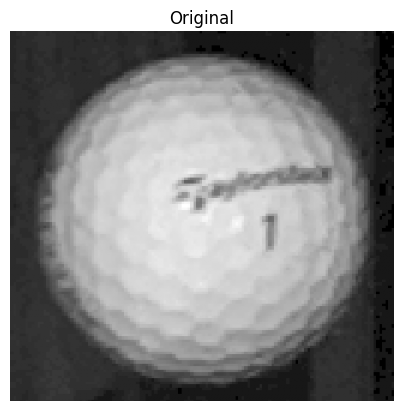

In [7]:
img = cv2.imread('data/Images/Screenshot 2025-06-10 145605.png', cv2.IMREAD_GRAYSCALE)
ball = Ball(x=img.shape[1]//2, y=img.shape[0]//2, r=min(img.shape)//2 - 5)
plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off');

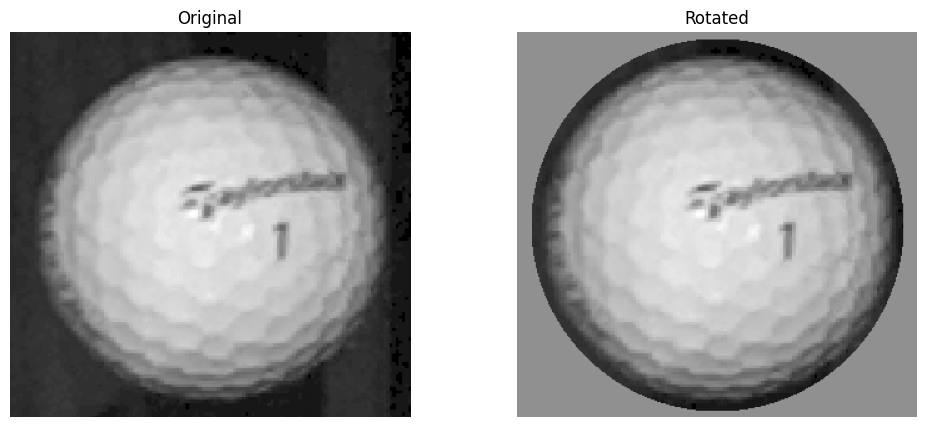

In [17]:
img3d = project_ball_to_3d(img, ball)
rotated3d = rotate_3d(img3d, ball, (0, 0, 0))
rotated2d = unproject(rotated3d)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(1,2,2); plt.imshow(rotated2d, cmap='gray'); plt.title('Rotated'); plt.axis('off');
plt.show()